In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# dataname = "V1_Mouse_Kidney"
dataname = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname = "V1_Mouse_Brain_Sagittal_Anterior"

samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
row = samples.loc[dataname]
ci = pd.read_parquet(row["class_input"])
meta = pd.read_csv(row["metadata"],sep="\t")
merged = ci.merge(meta[["barcode","quadrant","circle"]],on="barcode")

In [59]:
gene = "Myl6"
side1 = "juncPosR1A"
side2 = "juncPosR1B"
val = 128491033
exon_skip = 128492059
exon_inc = 128491720

In [10]:
gene = "Gng13"
side1 = "juncPosR1B"
side2 = "juncPosR1A"
val = 25718667
exon_skip = 25717277
exon_inc = 25717581

In [3]:
gene = "Rps24"
side1 = "juncPosR1A"
side2 = "juncPosR1B"
val = 24493493
# exon_skip = 24495430
# exon_inc = 24493617

exon_inc1 = 24495430
exon_inc2 = 24493617
exon_skip = 24495775

In [4]:
gene_df = merged[(merged["geneR1A_uniq"] == gene) & (merged[side1] == val)]

In [5]:
gene_df[side2].value_counts()

24495430    3298
24493617    2493
24494052    2264
24495775    1577
24495434       3
24495405       2
24552336       1
24561850       1
24495427       1
24557896       1
24577845       1
24530248       1
24495781       1
24519659       1
24495347       1
Name: juncPosR1B, dtype: int64

In [6]:
# outer circle has less exon inclusion
vc = gene_df[gene_df["circle"] == 1][side2].value_counts()
try:
  display(vc[exon_inc]/(vc[exon_inc] + vc[exon_skip]))
except:
  print('two included')
  display((vc[exon_inc1] + vc[exon_inc2])/(vc[exon_inc1] + vc[exon_inc2] + vc[exon_skip]))

two included


0.7879614475359156

In [7]:
# inner circle contains higher exon inclusion
vc = gene_df[gene_df["circle"] == 2][side2].value_counts()
try:
  display(vc[exon_inc]/(vc[exon_inc] + vc[exon_skip]))
except:
  print('two included')
  
  display((vc[exon_inc1] + vc[exon_inc2])/(vc[exon_inc1] + vc[exon_inc2] + vc[exon_skip]))

two included


0.7800963081861958

In [25]:
gene_df["frac_exon_inc"] = 

,refName_newR1,geneR1A_uniq,geneR1B_uniq,juncPosR1A,juncPosR1B,chrR1A,chrR1B,numReads,cell,barcode,...,array_row,array_col,xcoord,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant,quadrant,circle
187,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,5,V1_Mouse_Brain_Sagittal_Posterior_ATCAGGTAGCTG...,ATCAGGTAGCTGACAG-1,...,33.0,127.0,5372.0,10177.0,10177.0,-5372.0,77.0,0.0,1,1
1394,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,29,V1_Mouse_Brain_Sagittal_Posterior_CTGCCTTTAATA...,CTGCCTTTAATACCTT-1,...,64.0,28.0,9086.0,3360.0,3360.0,-9086.0,139.0,7.0,3,1
1395,chr14:Rps24:24493493:+|chr14:Rps24:24495775:+|lin,Rps24,Rps24,24493493,24495775,chr14,chr14,2,V1_Mouse_Brain_Sagittal_Posterior_CTGCCTTTAATA...,CTGCCTTTAATACCTT-1,...,64.0,28.0,9086.0,3360.0,3360.0,-9086.0,139.0,7.0,3,1
4138,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,45,V1_Mouse_Brain_Sagittal_Posterior_CTTAGGTATAGA...,CTTAGGTATAGACCAG-1,...,63.0,15.0,8967.0,2465.0,2465.0,-8967.0,137.0,6.0,3,1
4139,chr14:Rps24:24493493:+|chr14:Rps24:24495775:+|lin,Rps24,Rps24,24493493,24495775,chr14,chr14,2,V1_Mouse_Brain_Sagittal_Posterior_CTTAGGTATAGA...,CTTAGGTATAGACCAG-1,...,63.0,15.0,8967.0,2465.0,2465.0,-8967.0,137.0,6.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834889,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,1,V1_Mouse_Brain_Sagittal_Posterior_GGTGCGGATAAG...,GGTGCGGATAAGTGGC-1,...,16.0,46.0,3336.0,4599.0,4599.0,-3336.0,131.0,3.0,2,1
4835319,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,2,V1_Mouse_Brain_Sagittal_Posterior_GCATCGGCCGTG...,GCATCGGCCGTGTAGG-1,...,49.0,103.0,7289.0,8524.0,8524.0,-7289.0,127.0,1.0,4,1
4835450,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,1,V1_Mouse_Brain_Sagittal_Posterior_GCCATTAGCCTC...,GCCATTAGCCTCAAAC-1,...,55.0,13.0,8008.0,2327.0,2327.0,-8008.0,133.0,4.0,3,1
4835521,chr14:Rps24:24493493:+|chr14:Rps24:24495430:+|lin,Rps24,Rps24,24493493,24495430,chr14,chr14,1,V1_Mouse_Brain_Sagittal_Posterior_GTCGTGTCTGGT...,GTCGTGTCTGGTCATC-1,...,28.0,110.0,4773.0,9006.0,9006.0,-4773.0,142.0,8.0,1,1


In [ ]:
gene_df.groupb

In [8]:
for i in range(1,5):
  print("quadrant",i)
  vc = gene_df[gene_df["quadrant"] == i][side2].value_counts()
  try:
    display(vc[exon_inc]/(vc[exon_inc] + vc[exon_skip]))
  except:
    print('two included')
    display((vc[exon_inc1] + vc[exon_inc2])/(vc[exon_inc1] + vc[exon_inc2] + vc[exon_skip]))

quadrant 1
two included


0.8273037542662116

quadrant 2
two included


0.7636939791760978

quadrant 3
two included


0.758109360518999

quadrant 4
two included


0.8177083333333334

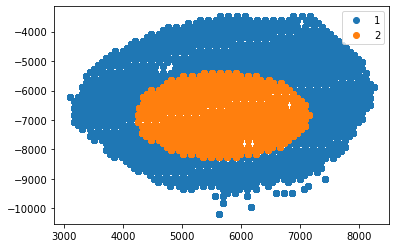

In [26]:
plt.plot(merged[merged["circle"] == 1]["plot_xcoord"],merged[merged["circle"] == 1]["plot_ycoord"],label="1",linestyle="",marker="o")
plt.plot(merged[merged["circle"] == 2]["plot_xcoord"],merged[merged["circle"] == 2]["plot_ycoord"], label = "2", linestyle="", marker="o")
plt.legend()
plt.show()

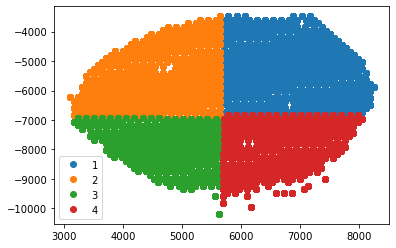

In [30]:
for i in range(1,5):
  plt.plot(merged[merged["quadrant"] == i]["plot_xcoord"],merged[merged["quadrant"] == i]["plot_ycoord"],label="{}".format(i),linestyle="",marker="o")
#   plt.plot(merged[merged["quadrant"] == 2]["plot_xcoord"],merged[merged["quadrant"] == 2]["plot_ycoord"], label = "2", linestyle="", marker="o")
plt.legend()
plt.show()